In [7]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
# Load the datasets
cycle_file = "Cycle.csv"
step_file = "Step_count.csv"

# Read the CSV files
cycle_df = pd.read_csv(cycle_file)
step_df = pd.read_csv(step_file)

# Ensure both are DataFrames
cycle_df = pd.DataFrame(cycle_df)
step_df = pd.DataFrame(step_df)

# Convert 'Dates' columns to datetime format
cycle_df['Dates'] = pd.to_datetime(cycle_df['Dates'], format='%d.%m.%Y')
step_df['Dates'] = pd.to_datetime(step_df['Dates'], format='%d.%m.%Y')

# Merge the two datasets on 'Dates'
merged_df = pd.merge(cycle_df, step_df, on='Dates', how='inner')

# Add 'Month_Year' column for monthly grouping
merged_df['Month_Year'] = merged_df['Dates'].dt.to_period('M')

# Calculate monthly averages for 'Step Count', excluding values below 10
monthly_averages = merged_df[merged_df['Step Count'] >= 10].groupby('Month_Year')['Step Count'].mean()

# Replace 'Step Count' values below 10 with their respective monthly averages
merged_df['Step Count'] = merged_df.apply(
    lambda row: monthly_averages[row['Month_Year']] if row['Step Count'] < 10 else row['Step Count'], axis=1
)

# Drop the helper 'Month_Year' column as it is no longer needed
merged_df.drop(columns=['Month_Year'], inplace=True)

# Display the cleaned and aligned DataFrame
print("Cleaned and Aligned Data:")
print(merged_df.head())

# Optionally, save the cleaned dataset to a CSV file
merged_df.to_csv("Cleaned_Cycle_and_Step_Count_Data.csv", index=False)

Cleaned and Aligned Data:
       Dates  Cycle Yes/No  Step Count
0 2020-01-09             0      2856.0
1 2020-01-10             0      3764.0
2 2020-01-11             0      5915.0
3 2020-01-12             0      2454.0
4 2020-01-13             0      2035.0


In [9]:
display(cycle_df)
display(step_df)

,Dates,Cycle Yes/No
0,2020-01-09,0
1,2020-01-10,0
2,2020-01-11,0
3,2020-01-12,0
4,2020-01-13,0
...,...,...
1768,2024-11-12,1
1769,2024-11-13,0
1770,2024-11-14,0
1771,2024-11-15,0


,Dates,Step Count
0,2020-01-09,2856.0
1,2020-01-10,3764.0
2,2020-01-11,5915.0
3,2020-01-12,2454.0
4,2020-01-13,2035.0
...,...,...
1768,2024-11-12,1780.0
1769,2024-11-13,4135.0
1770,2024-11-14,5309.0
1771,2024-11-15,2081.0


In [10]:
cycle_df.info()
step_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1773 entries, 0 to 1772
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Dates         1773 non-null   datetime64[ns]
 1   Cycle Yes/No  1773 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 27.8 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1773 entries, 0 to 1772
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Dates       1773 non-null   datetime64[ns]
 1   Step Count  1773 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 27.8 KB


In [11]:
merged_file = "Cleaned_Cycle_and_Step_Count_Data.csv"
merged_df = pd.read_csv(merged_file)
merged_df = pd.DataFrame(merged_df)

In [12]:
print("Summary Statistics for Cycle_df:")
print(cycle_df.describe())

print("\nSummary Statistics for Step_df:")
print(step_df.describe())

print("\nSummary Statistics for Cleaned_Cycle_and_Step_Count_Data:")
print(merged_df.describe())


Summary Statistics for Cycle_df:
                               Dates  Cycle Yes/No
count                           1773   1773.000000
mean   2022-06-13 17:28:31.675126784      0.178793
min              2020-01-09 00:00:00      0.000000
25%              2021-03-27 00:00:00      0.000000
50%              2022-06-14 00:00:00      0.000000
75%              2023-08-31 00:00:00      0.000000
max              2024-11-16 00:00:00      1.000000
std                              NaN      0.383287

Summary Statistics for Step_df:
                               Dates   Step Count
count                           1773   1773.00000
mean   2022-06-13 17:28:31.675126784   4206.66960
min              2020-01-09 00:00:00     10.00000
25%              2021-03-27 00:00:00   1822.00000
50%              2022-06-14 00:00:00   3560.00000
75%              2023-08-31 00:00:00   5713.00000
max              2024-11-16 00:00:00  25274.00000
std                              NaN   3254.86956

Summary Statistics for C

In [13]:
# Ensure the 'Dates' column is in datetime format
merged_df['Dates'] = pd.to_datetime(merged_df['Dates'], errors='coerce')

# Adding the day of the week column to the merged dataset
# Extracts the name of the day (e.g., Monday, Tuesday) for each date in the 'Dates' column
merged_df['DayOfWeek'] = merged_df['Dates'].dt.day_name()

# Counting the number of occurrences for each day of the week
# Counts how many times each day of the week occurs in the dataset
steps_per_day = merged_df['DayOfWeek'].value_counts()

# Printing the results
# Displays the count of steps for each day of the week to understand activity distribution
print("Step Counts per Day of the Week:")
print(steps_per_day)



Step Counts per Day of the Week:
DayOfWeek
Thursday     254
Friday       254
Saturday     254
Sunday       253
Monday       253
Tuesday      253
Wednesday    252
Name: count, dtype: int64


In [14]:
# Ensure the 'Dates' column in cycle_df is in datetime format
cycle_df['Dates'] = pd.to_datetime(cycle_df['Dates'], errors='coerce')

# Adding the day of the week column for menstrual cycle data
# Extracts the name of the day (e.g., Monday, Tuesday) for each date in the 'Dates' column
cycle_df['DayOfWeek'] = cycle_df['Dates'].dt.day_name()

# Filtering only the days marked as menstrual cycle days (Cycle Yes/No = 1)
menstrual_days = cycle_df[cycle_df['Cycle Yes/No'] == 1]

# Counting the number of menstrual cycle days for each day of the week
menstrual_days_per_weekday = menstrual_days['DayOfWeek'].value_counts()

# Printing the results
# Displays the count of menstrual cycle days for each day of the week
print("Menstrual Cycle Days per Day of the Week:")
print(menstrual_days_per_weekday)

Menstrual Cycle Days per Day of the Week:
DayOfWeek
Wednesday    51
Thursday     49
Sunday       48
Saturday     45
Friday       44
Monday       41
Tuesday      39
Name: count, dtype: int64


In [15]:
# Ensure the 'Dates' column in merged_df is in datetime format
merged_df['Dates'] = pd.to_datetime(merged_df['Dates'], errors='coerce')

# Extracting the day of the week and creating a new column
merged_df['Day_of_Week'] = merged_df['Dates'].dt.day_name()

# Grouping by 'Day_of_Week' and summing the 'Step Count' for each day
total_steps_per_day = merged_df.groupby('Day_of_Week')['Step Count'].sum()

# Converting the result to integers
total_steps_per_day = total_steps_per_day.astype(int)

# Sorting the result in descending order
total_steps_per_day = total_steps_per_day.sort_values(ascending=False)

# Printing the result
print("Total Steps Per Day of the Week (Descending Order):")
print(total_steps_per_day)

Total Steps Per Day of the Week (Descending Order):
Day_of_Week
Friday       1249505
Saturday     1160167
Wednesday    1112434
Tuesday      1037579
Monday       1029153
Thursday     1019307
Sunday        850276
Name: Step Count, dtype: int64


In [16]:
# Numeric columns selection
numeric_columns = merged_df.select_dtypes(include='number').columns

# Correlation matrix
correlation_matrix = merged_df[numeric_columns].corr()

# Display the correlation matrix
print("\nCorrelation Matrix for merged_df:")
print(correlation_matrix)


Correlation Matrix for merged_df:
              Cycle Yes/No  Step Count
Cycle Yes/No      1.000000   -0.000863
Step Count       -0.000863    1.000000


A correlation heatmap to analyze the relationship between cycle days and step counts. The plot shows no significant correlation, as indicated by the near-zero value, suggesting that cycle days do not have a strong linear impact on step counts.

Correlation Matrix for the Merged Dataset:
              Cycle Yes/No  Step Count
Cycle Yes/No      1.000000   -0.000863
Step Count       -0.000863    1.000000


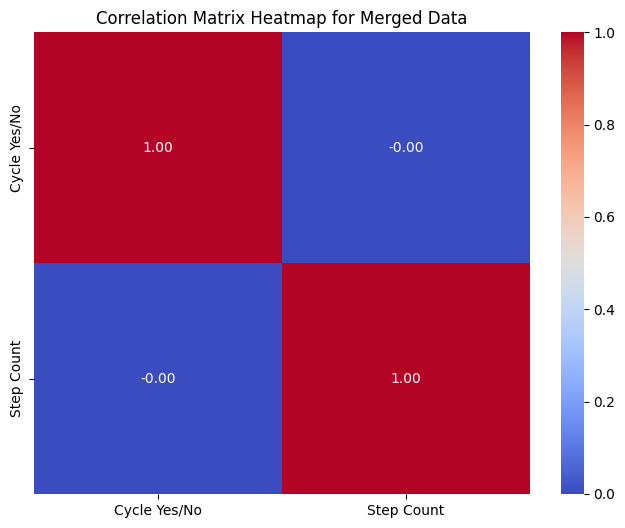

In [17]:
# Select only numeric columns for the correlation calculation
numeric_columns = merged_df.select_dtypes(include='number')

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Display the correlation matrix
print("Correlation Matrix for the Merged Dataset:")
print(correlation_matrix)

# Visualizing the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap for Merged Data")
plt.show()


A histogram to show the distribution of my daily step counts and identify patterns in activity levels. Most of my days fall between 0 and 5000 steps, indicating moderate activity, while fewer days exceed 10,000 steps.

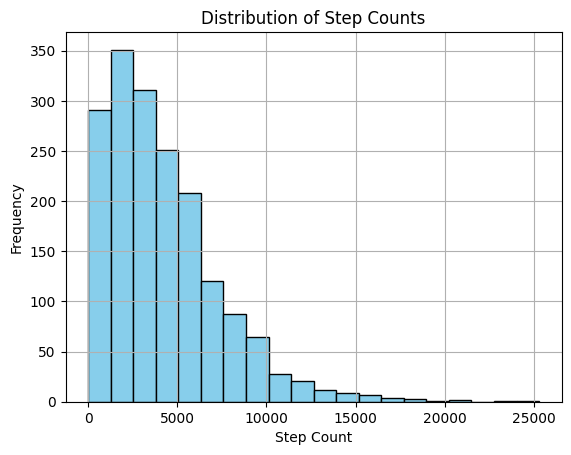

In [18]:
plt.hist(merged_df['Step Count'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Step Counts')
plt.xlabel('Step Count')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

A box plot to compare my step counts between cycle and non-cycle days and observe variations in activity. Step counts tend to be lower on cycle days, with a narrower range, compared to non-cycle days where they are more varied.

<ipython-input-19-16c02619b2ef>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cycle Yes/No', y='Step Count', data=merged_df, palette='coolwarm')


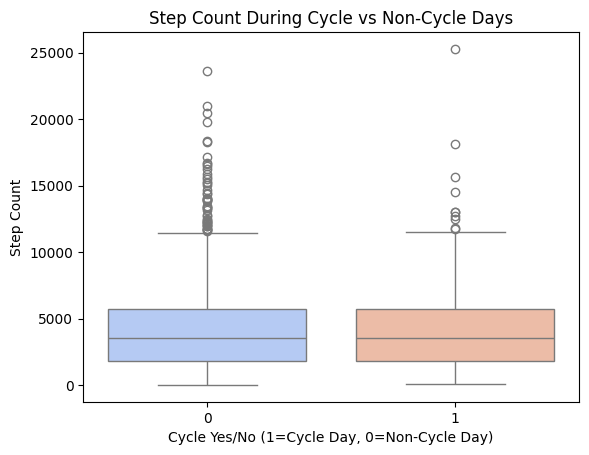

In [19]:
sns.boxplot(x='Cycle Yes/No', y='Step Count', data=merged_df, palette='coolwarm')
plt.title('Step Count During Cycle vs Non-Cycle Days')
plt.xlabel('Cycle Yes/No (1=Cycle Day, 0=Non-Cycle Day)')
plt.ylabel('Step Count')
plt.show()


A line plot to track my daily step counts over time and observe trends in activity levels. It reveals fluctuations in activity levels, with some days showing high peaks exceeding 20,000 steps, while others are much lower.

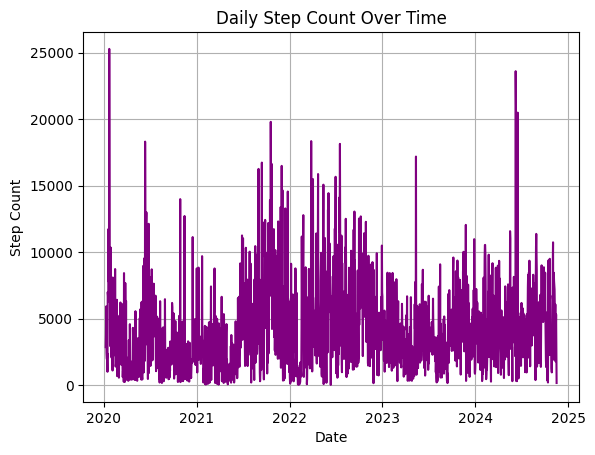

In [20]:
plt.plot(merged_df['Dates'], merged_df['Step Count'], color='purple')
plt.title('Daily Step Count Over Time')
plt.xlabel('Date')
plt.ylabel('Step Count')
plt.grid(True)
plt.show()


A line plot with a moving average to track my daily step counts over time and smooth out fluctuations in activity. It highlights consistent trends, with the red 7-day moving average showing periods of increased or decreased activity, while individual days occasionally peak above 20,000 steps.

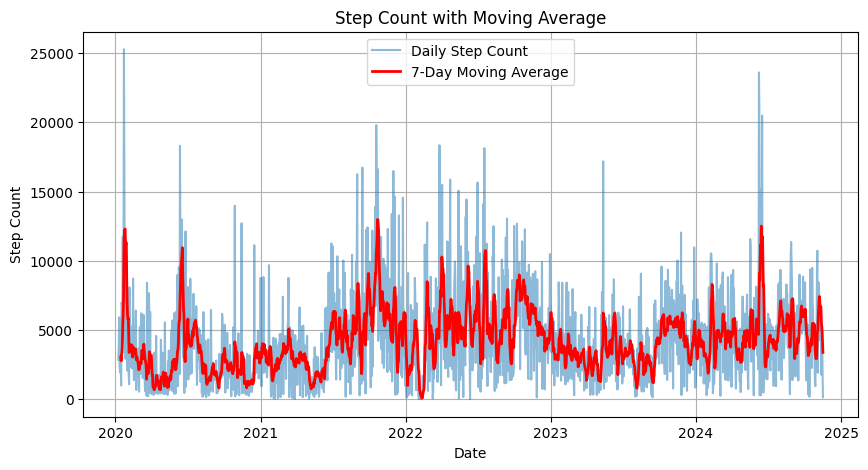

In [21]:
merged_df['Moving_Avg'] = merged_df['Step Count'].rolling(window=7).mean()

plt.figure(figsize=(10, 5))
plt.plot(merged_df['Dates'], merged_df['Step Count'], label='Daily Step Count', alpha=0.5)
plt.plot(merged_df['Dates'], merged_df['Moving_Avg'], label='7-Day Moving Average', color='red', linewidth=2)
plt.title('Step Count with Moving Average')
plt.xlabel('Date')
plt.ylabel('Step Count')
plt.legend()
plt.grid(True)
plt.show()


A pie chart to show the proportion of my total step counts on cycle and non-cycle days. It highlights that 82.1% of my steps were taken on non-cycle days, while only 17.9% were on cycle days, reflecting a significant difference in activity levels.

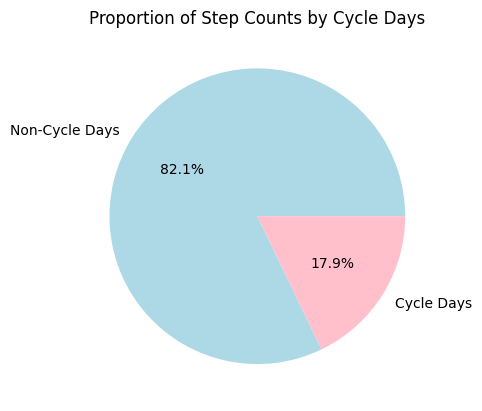

In [22]:
step_counts_by_cycle = merged_df.groupby('Cycle Yes/No')['Step Count'].sum()

plt.pie(step_counts_by_cycle, labels=['Non-Cycle Days', 'Cycle Days'], autopct='%1.1f%%', colors=['lightblue', 'pink'])
plt.title('Proportion of Step Counts by Cycle Days')
plt.show()


A violin plot to compare the distribution of my step counts between cycle and non-cycle days. It shows that non-cycle days have a wider range and higher activity levels, while step counts on cycle days are more consistent and generally lower.

<ipython-input-23-aae3c6aa82b7>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Cycle Yes/No', y='Step Count', data=merged_df, palette='muted')


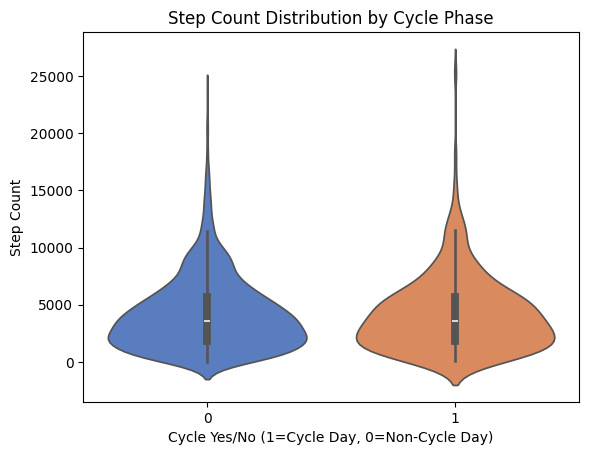

In [23]:
sns.violinplot(x='Cycle Yes/No', y='Step Count', data=merged_df, palette='muted')
plt.title('Step Count Distribution by Cycle Phase')
plt.xlabel('Cycle Yes/No (1=Cycle Day, 0=Non-Cycle Day)')
plt.ylabel('Step Count')
plt.show()


A bar chart to compare the average step count for each day of the week. It shows that Friday and Saturday are my most active days, while Sunday has the lowest average step count.

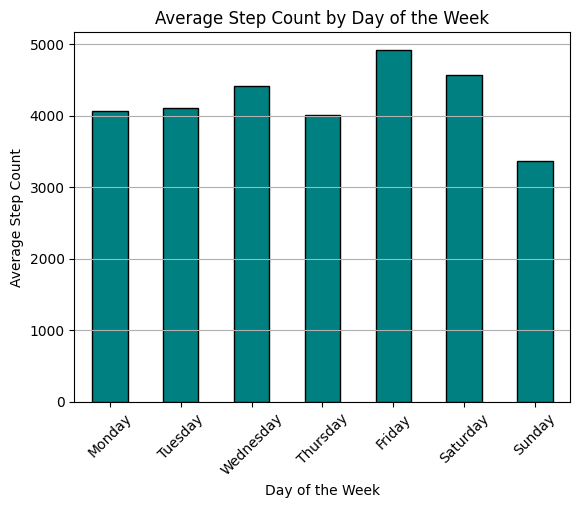

In [24]:
steps_by_weekday = merged_df.groupby('Day_of_Week')['Step Count'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

steps_by_weekday.plot(kind='bar', color='teal', edgecolor='black')
plt.title('Average Step Count by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Step Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


A line plot to show my step count trends over time, with cycle days highlighted in red. It illustrates that step counts tend to decrease on cycle days, showing a noticeable impact of the menstrual cycle on activity levels.

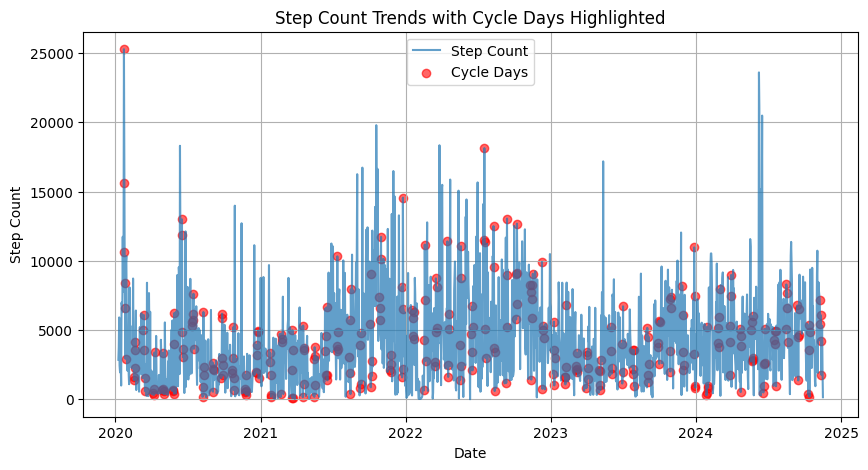

In [25]:
plt.figure(figsize=(10, 5))
plt.plot(merged_df['Dates'], merged_df['Step Count'], label='Step Count', alpha=0.7)
plt.scatter(merged_df['Dates'][merged_df['Cycle Yes/No'] == 1],
            merged_df['Step Count'][merged_df['Cycle Yes/No'] == 1],
            color='red', label='Cycle Days', alpha=0.6)
plt.title('Step Count Trends with Cycle Days Highlighted')
plt.xlabel('Date')
plt.ylabel('Step Count')
plt.legend()
plt.grid(True)
plt.show()


The analysis and visualization part is over. Now we will dive into Machine Learning part.

In [26]:
# Reimport necessary libraries after reset
import pandas as pd
from sklearn.model_selection import train_test_split

# Reload the cleaned data file
cleaned_data = pd.read_csv('Cleaned_Cycle_and_Step_Count_Data.csv')

# Prepare the features (X) and target (y)
X = cleaned_data[['Step Count']]
y = cleaned_data['Cycle Yes/No']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify the shapes of the split datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((1418, 1), (355, 1), (1418,), (355,))

The dataset is split into 80% training and 20% testing, using 'Step Count' as the feature and 'Cycle Yes/No' as the target. The resulting shapes are (1418, 1) for training and (355, 1) for testing.

In [27]:
# Feature engineering: Extract additional features from the "Dates" column

# Convert "Dates" to datetime format
cleaned_data['Dates'] = pd.to_datetime(cleaned_data['Dates'])

# Extract day of the week (0=Monday, 6=Sunday)
cleaned_data['Day of Week'] = cleaned_data['Dates'].dt.dayofweek

# Extract month (1=January, 12=December)
cleaned_data['Month'] = cleaned_data['Dates'].dt.month

# Extract whether the day is a weekend (1=True, 0=False)
cleaned_data['Is Weekend'] = cleaned_data['Day of Week'].apply(lambda x: 1 if x >= 5 else 0)

# Display the updated dataset
cleaned_data.head()


,Dates,Cycle Yes/No,Step Count,Day of Week,Month,Is Weekend
0,2020-01-09,0,2856.0,3,1,0
1,2020-01-10,0,3764.0,4,1,0
2,2020-01-11,0,5915.0,5,1,1
3,2020-01-12,0,2454.0,6,1,1
4,2020-01-13,0,2035.0,0,1,0


The dataset now includes three new columns: Day of Week, Month, and Is Weekend. For example, in the first row, the date corresponds to a weekday (Day of Week = 3, Is Weekend = 0), and the month is January (Month = 1).


Model Evaluation:
Accuracy: 0.71
ROC AUC Score: 0.48

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.85      0.82       283
           1       0.20      0.15      0.17        72

    accuracy                           0.71       355
   macro avg       0.50      0.50      0.50       355
weighted avg       0.68      0.71      0.69       355


Confusion Matrix:
[[240  43]
 [ 61  11]]


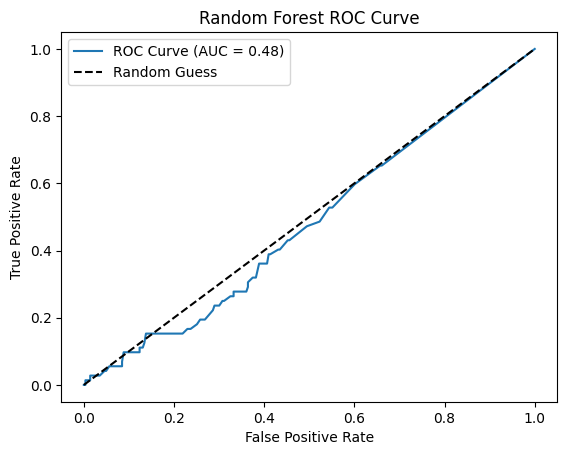


Feature Importance:
Step Count: 1.00


In [28]:
# Reimport necessary libraries after reset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import matplotlib.pyplot as plt

# Reload the cleaned data file
cleaned_data = pd.read_csv('Cleaned_Cycle_and_Step_Count_Data.csv')

# Prepare the features (X) and target (y)
X = cleaned_data[['Step Count']]
y = cleaned_data['Cycle Yes/No']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, max_depth=None, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions on the test set
y_pred = rf_model.predict(X_test)
y_prob = rf_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_prob)

print("\nModel Evaluation:")
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC AUC Score: {roc_auc:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:")
print(conf_matrix)

# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest ROC Curve")
plt.legend()
plt.show()

# Feature Importance
feature_importance = rf_model.feature_importances_
print("\nFeature Importance:")
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance:.2f}")


Null Hypothesis (H₀): There is no significant relationship between step count and menstrual cycle days. Step counts are not predictive of whether a day is part of the menstrual cycle or not.

Alternative Hypothesis (H₁): There is a significant relationship between step count and menstrual cycle days. Step counts can be used to predict whether a day is part of the menstrual cycle.

Derivation of the Hypothesis:

This hypothesis is founded on the idea that daily step counts, which measure physical activity levels, change throughout different stages of the menstrual cycle. This variation is thought to be influenced by hormonal shifts that affect both energy levels and activity patterns. By using a Random Forest model, we plan to analyze this connection and determine if step counts can predict specific days in the menstrual cycle.  To assess the hypothesis, we will look at: Model accuracy: A high accuracy rate would suggest a strong link between the variables. ROC AUC Score: A score significantly higher than 0.5 would indicate that the model effectively distinguishes between cycle days and non-cycle days. Classification metrics (Precision, Recall, F1-Score): These metrics will show how well the model can accurately identify the days.

Expected Impact:

Health Insights: This research could reveal important information about the relationship between physical activity and menstrual cycles, which might help in creating personalized health plans.

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [17:07:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



XGBoost Model Evaluation:
Accuracy: 0.78
ROC AUC Score: 0.48

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.98      0.88       283
           1       0.00      0.00      0.00        72

    accuracy                           0.78       355
   macro avg       0.40      0.49      0.44       355
weighted avg       0.63      0.78      0.70       355


Confusion Matrix:
[[277   6]
 [ 72   0]]


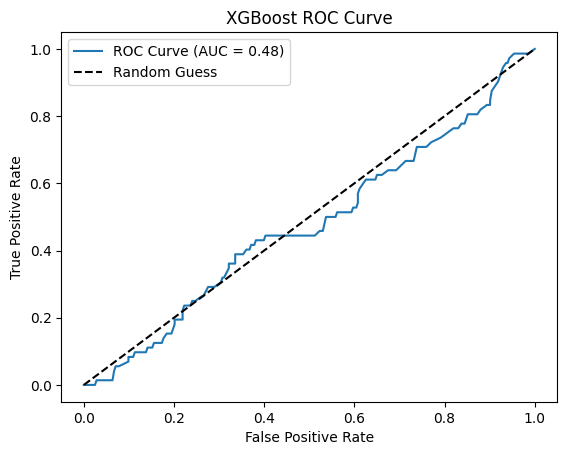

In [29]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Train an XGBoost Classifier
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)

# Predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
roc_auc_xgb = roc_auc_score(y_test, y_prob_xgb)

print("\nXGBoost Model Evaluation:")
print(f"Accuracy: {accuracy_xgb:.2f}")
print(f"ROC AUC Score: {roc_auc_xgb:.2f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

# Confusion Matrix
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
print("\nConfusion Matrix:")
print(conf_matrix_xgb)

# Plot ROC Curve
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, label=f"ROC Curve (AUC = {roc_auc_xgb:.2f})")
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XGBoost ROC Curve")
plt.legend()
plt.show()


Null Hypothesis (H₀): Step count data does not significantly contribute to predicting menstrual cycle days. The XGBoost classifier will perform no better than random guessing.

Alternative Hypothesis (H₁): Step count data significantly contributes to predicting menstrual cycle days. The XGBoost classifier will perform better than random guessing and show strong predictive performance.

Derivation of the Hypothesis:

The hypothesis is derived from the expectation that XGBoost's advanced gradient boosting framework can capture subtle patterns in step count data that correlate with menstrual cycle phases. By training the classifier, we aim to test this hypothesis through metrics such as:

Accuracy and ROC AUC Score: To evaluate the overall performance and discriminative ability of the model.
Classification Metrics (Precision, Recall, F1-Score): To measure the model's precision in identifying cycle days and non-cycle days.
Confusion Matrix: To understand how well the model balances false positives and false negatives.
The advanced feature handling and regularization capabilities of XGBoost make it an excellent candidate for identifying nuanced relationships that Random Forest might overlook.

Expected Impact:

Improved Predictive Power: If the XGBoost model outperforms Random Forest in terms of accuracy and ROC AUC, it indicates that step count data contains more predictive power than previously captured.
Health Tracking Insights: A better-performing model could lead to enhanced predictions for menstrual cycle tracking, supporting personalized health recommendations.